Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam


In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Unzipping the zip file
!unzip gdrive/MyDrive/CNN_assignment

Archive:  gdrive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin ca

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    validation_split=0.2,
    seed=123,
    subset="training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    validation_split=0.2,
    seed=123,
    subset= "validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

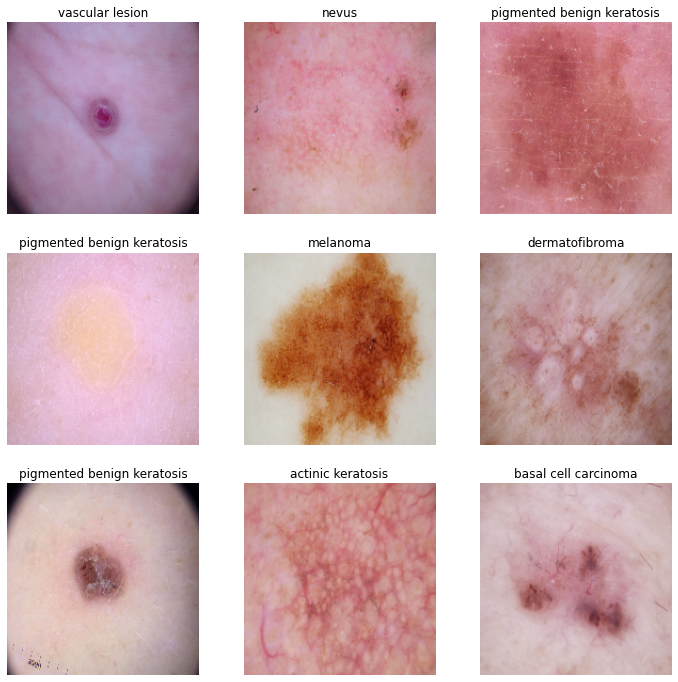

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(12,12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
model = Sequential([layers.experimental.preprocessing.Rescaling(scale=1./255,offset =0.0,input_shape=(180, 180, 3))])

model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(9,activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function

optimizer = Adam(lr=0.0005)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
# View the summary of all layers

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 24s 71ms/step - loss: 1.9191 - accuracy: 0.2790 - val_loss: 1.6723 - val_accuracy: 0.3535
Epoch 2/20
56/56 [==============================] - 1s 24ms/step - loss: 1.6283 - accuracy: 0.3968 - val_loss: 1.6073 - val_accuracy: 0.4228
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.5397 - accuracy: 0.4520 - val_loss: 1.4541 - val_accuracy: 0.4944
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4252 - accuracy: 0.4967 - val_loss: 1.3865 - val_accuracy: 0.5011
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3469 - accuracy: 0.5190 - val_loss: 1.3517 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2776 - accuracy: 0.5530 - val_loss: 1.3713 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2267 - accuracy: 0.5636 - val_loss: 1.3033 - val_accuracy: 0.5391
Epoch 8/20
5

### Visualizing training results

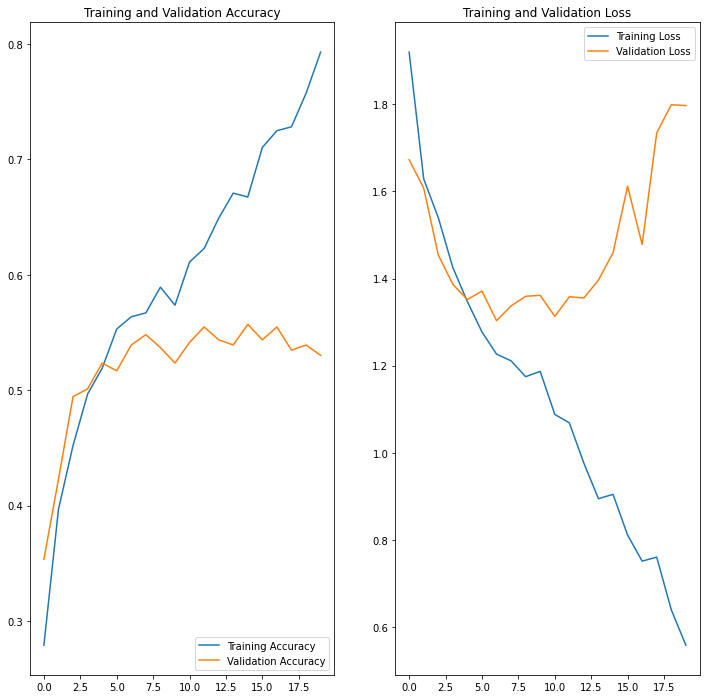

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
It is clearly observed from the above plotted graph that the model is overfitting beacuse training accuracy is around 80% and validation accuracy is very less and hovering over 50-55%.
Also, the loss was first decreasing but after few iterations, it strated increasing. 

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (img_height, img_width,3)),
     layers.experimental.preprocessing.RandomRotation(0.3),
     layers.experimental.preprocessing.RandomZoom(0.3)
    ]
)

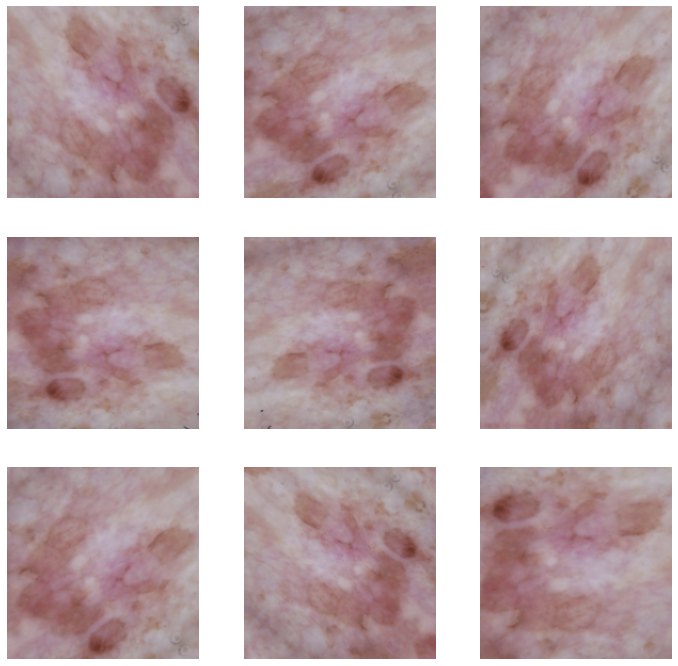

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

images,label = next(iter(train_ds))
images = np.array(images,np.int32)
plt.figure(figsize=(12,12))
for i in range(9):
  augmented_image=data_augmentation(images)
  ax = plt.subplot(3,3,i+1)
  augmented_image1 = np.array(augmented_image[3],np.int32)
  plt.imshow(augmented_image1)
  plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [29]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here

model_augmented = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model_augmented.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=(180,180,3)))
model_augmented.add(MaxPooling2D(pool_size = (2, 2)))
model_augmented.add(Dropout(0.2))

model_augmented.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model_augmented.add(MaxPooling2D(pool_size = (2, 2)))
model_augmented.add(Dropout(0.2))

model_augmented.add(Conv2D(64, (3, 3), activation='relu'))
model_augmented.add(MaxPooling2D(pool_size=(2, 2)))
model_augmented.add(Dropout(0.3))

model_augmented.add(Conv2D(128, (3, 3), activation='relu'))
model_augmented.add(MaxPooling2D(pool_size=(2, 2)))
model_augmented.add(Dropout(0.3))

model_augmented.add(Flatten())
model_augmented.add(Dense(512, activation='relu'))
model_augmented.add(Dropout(0.5))

model_augmented.add(Dense(9,activation='softmax'))

### Compiling the model

In [30]:
## Your code goes here
optimizer = Adam(learning_rate=0.0005)

model_augmented.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

### Training the model

In [31]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 28ms/step - loss: 2.0952 - accuracy: 0.1892 - val_loss: 2.1156 - val_accuracy: 0.2215
Epoch 2/20
56/56 [==============================] - 1s 26ms/step - loss: 2.0321 - accuracy: 0.2171 - val_loss: 2.0883 - val_accuracy: 0.2192
Epoch 3/20
56/56 [==============================] - 1s 25ms/step - loss: 1.8060 - accuracy: 0.3449 - val_loss: 1.7713 - val_accuracy: 0.4318
Epoch 4/20
56/56 [==============================] - 1s 26ms/step - loss: 1.6573 - accuracy: 0.3951 - val_loss: 1.6857 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 1s 25ms/step - loss: 1.5392 - accuracy: 0.4548 - val_loss: 1.5659 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 1s 25ms/step - loss: 1.4755 - accuracy: 0.4833 - val_loss: 1.5374 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4592 - accuracy: 0.4844 - val_loss: 1.5245 - val_accuracy: 0.4989
Epoch 8/20
56

### Visualizing the results

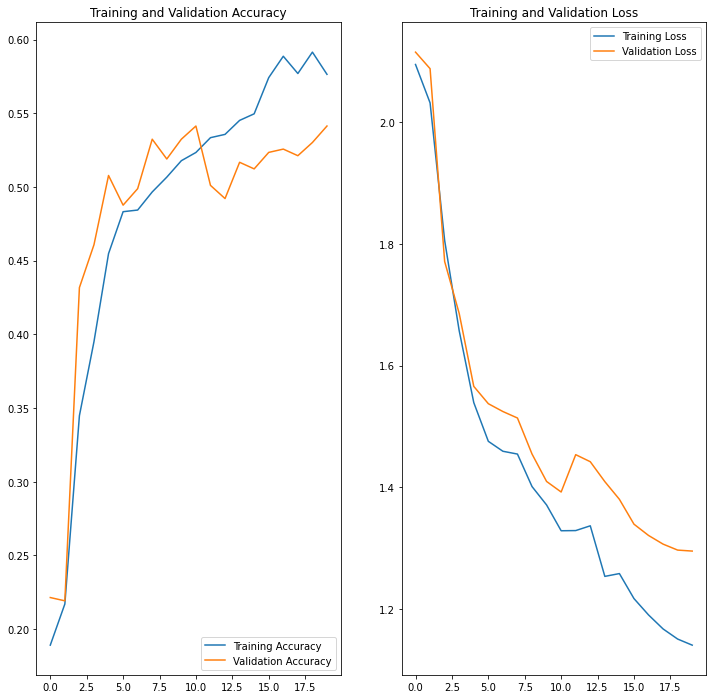

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### **The problem of overfitting which we were facing is resolved by using Dropout after Convolution layers and Dense layer. But we can observe that the accuracy has gone down.** 
#### **Also,the loss has decreased gradually**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [33]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

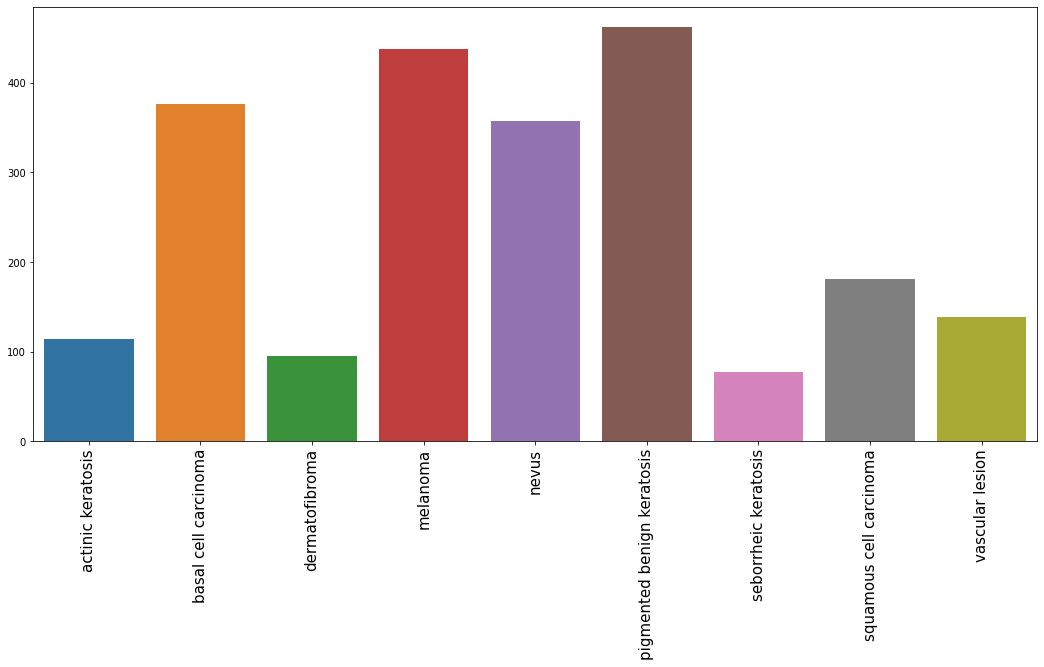

In [34]:
count_class=[]
for i in class_names:
    count_class.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(18,8))
sns.barplot(x=class_names,y=count_class)
plt.xticks(rotation=90,fontsize=15)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

**Seborrheic keratosis is having the least number of samples**

#### - Which classes dominate the data in terms proportionate number of samples?

**Pigmented Benign Keratosis and Melanoma dominate the data in terms proportionate number of samples**

**Basal Cell Carcinoma and Nevus are also dominating with high number of samples**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [35]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [36]:
training_dataset_path ="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(training_dataset_path + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFFDE4B3A50>: 100%|██████████| 500/500 [00:16<00:00, 30.46 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFFDE637110>: 100%|██████████| 500/500 [00:16<00:00, 30.45 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EFFDE637210>: 100%|██████████| 500/500 [00:16<00:00, 30.02 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7EFFDE4F28D0>: 100%|██████████| 500/500 [01:26<00:00,  5.76 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7EFFDEB6E610>: 100%|██████████| 500/500 [01:27<00:00,  5.70 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0100551350>: 100%|██████████| 500/500 [00:16<00:00, 29.60 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EFFDEB006D0>: 100%|██████████| 500/500 [00:40<00:00, 12.24 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F00F7A79310>: 100%|██████████| 500/500 [00:17<00:00, 28.22 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F00722A81D0>: 100%|██████████| 500/500 [00:19<00:00, 25.64 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [37]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [38]:
from glob import glob

In [39]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011130.jpg_e6e0409b-34b8-4555-aff2-8b4a7ab5605d.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010349.jpg_21faa394-6ffc-41ed-8d5a-661efa3bb14b.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010007.jpg_f3cefd88-d0c4-4b26-8d5a-5ab926a937e4.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000161.jpg_409d24c6-f93b-4abe-bac4-0be0f887c08f.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011137.jpg_3c062695-cd78-4f3f-8096-78bd37312cdc.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000285.jpg_483ba151-e484-4915-9f9f-4f8e3f63bf27.jpg',
 'Skin cancer IS

In [40]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [41]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [42]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [43]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [44]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [45]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [51]:
## your code goes here

model_final= Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model_final.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=(180,180,3)))
model_final.add(Conv2D(16,kernel_size=(3, 3), activation='relu'))
model_final.add(MaxPooling2D(pool_size = (2, 2)))
model_final.add(Dropout(0.2))

model_final.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model_final.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model_final.add(MaxPooling2D(pool_size = (2, 2)))
model_final.add(Dropout(0.2))

model_final.add(Conv2D(64, (3, 3), activation='relu'))
model_final.add(MaxPooling2D(pool_size=(2, 2)))
model_final.add(Dropout(0.3))

model_final.add(Conv2D(128, (3, 3), activation='relu'))
model_final.add(MaxPooling2D(pool_size=(2, 2)))
model_final.add(Dropout(0.3))

model_final.add(Flatten())
model_final.add(Dense(512, activation='relu'))
model_final.add(Dropout(0.5))

model_final.add(Dense(9,activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [52]:
## Your code goes here
optimizer = Adam(learning_rate=0.0005)

model_final.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [53]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 27s 146ms/step - loss: 2.1657 - accuracy: 0.1612 - val_loss: 1.9692 - val_accuracy: 0.2747
Epoch 2/30
169/169 [==============================] - 25s 146ms/step - loss: 1.7899 - accuracy: 0.2977 - val_loss: 1.5997 - val_accuracy: 0.4046
Epoch 3/30
169/169 [==============================] - 27s 159ms/step - loss: 1.5975 - accuracy: 0.3891 - val_loss: 1.5287 - val_accuracy: 0.4254
Epoch 4/30
169/169 [==============================] - 25s 143ms/step - loss: 1.4820 - accuracy: 0.4325 - val_loss: 1.4329 - val_accuracy: 0.4469
Epoch 5/30
169/169 [==============================] - 29s 165ms/step - loss: 1.3932 - accuracy: 0.4687 - val_loss: 1.3958 - val_accuracy: 0.4699
Epoch 6/30
169/169 [==============================] - 25s 144ms/step - loss: 1.3114 - accuracy: 0.4989 - val_loss: 1.3039 - val_accuracy: 0.5249
Epoch 7/30
169/169 [==============================] - 26s 152ms/step - loss: 1.2463 - accuracy: 0.5260 - val_loss: 1.2164 - val_ac

#### **Todo:**  Visualize the model results

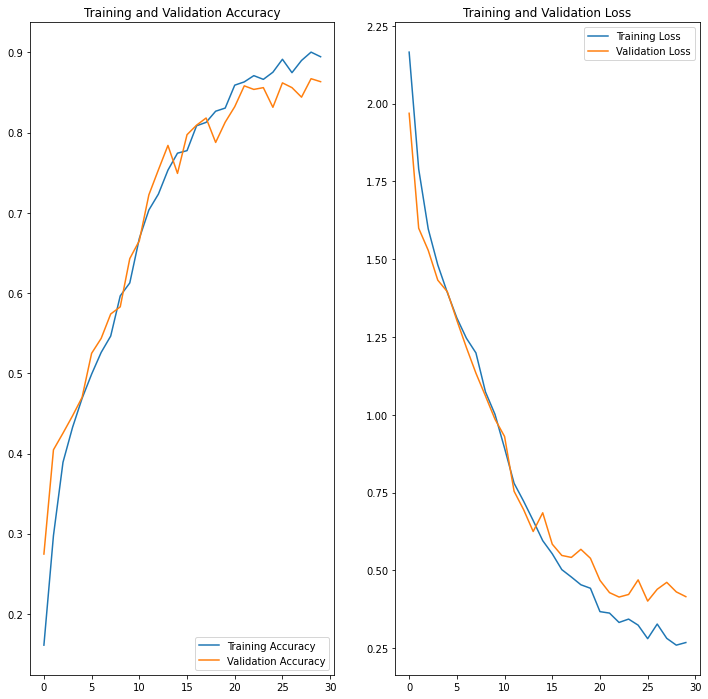

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Yes, The class rebalance by Augmenting the input data by 500 samples in reducing overfititng problem and also the loss has reduced. The Accuracy have increased very much as compared to previous models.

We can see from the above plot, that the validation accuracy follows the training accuracy with very less difference in them.

Performance of the model has been tremendously improved when compared with the model without class rebalance or data augmentation.